# 과제1: tensorflow를 이용한 NN 밑바닥부터 구현
input feature가 100개이고,  
hidden layer가 2개이고 neuron이 각각 50,10개이고,  
output이 5개인 NN를 구현해 보자  
* hidden layer는 relu를 activation function으로, output layer는 softmax를 activation function으로 사용

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#n_x: the size of the input layer - n_h: the size of the hidden layer - n_y: the size of the output layer
n_x = 100
n_h1 = 50
n_h2 = 10
n_y = 5

In [3]:
# Simulate train set
m = 500

# random.randn() 함수는 표준정규분포 (Standard normal distribution)로부터 샘플링된 난수를 반환
x_train=np.random.randn(m,n_x).astype(np.float32)
# np.zeros는 0으로 가득 찬 array를 생성
y_train=np.zeros((m,n_y)).astype(np.float32)
y_train[np.arange(m),np.random.randint(n_y,size=m)]=1

print(x_train)
print(y_train)

[[ 1.1844203  -0.19881895  0.07912972 ...  2.659698    0.9916233
  -0.83417845]
 [-1.5872066  -1.88507    -1.8237683  ...  0.14813621 -0.30632576
   0.21330331]
 [ 0.02543448 -0.53744334 -0.84537387 ...  1.7847674  -0.1944554
  -0.29270366]
 ...
 [ 1.4387728  -0.23078904  0.65958506 ... -0.88767475 -0.01487069
   0.53687775]
 [ 0.3808661  -0.07579305 -0.7782134  ...  2.2906873   0.32059285
  -0.35230112]
 [ 0.5105739  -0.85721165  0.599154   ... -0.09468657 -0.63704866
   1.2153814 ]]
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


* Initialization of weights

In [4]:
w1=tf.Variable(1e-3*np.random.randn(n_x,n_h1).astype(np.float32),name="w1")   #100*50
## 코드를 작성해 보세요 ##
w2=tf.Variable(1e-3*np.random.randn(n_h1,n_h2).astype(np.float32),name="w2")  #50*10
w3=tf.Variable(1e-3*np.random.randn(n_h2,n_y).astype(np.float32),name="w3")     #10*5

* forward propagation을 통해 prediction 값을 구하고, loss를 구하는 function을 만들어 봅시다

In [5]:
def forward(x):
    z1=tf.matmul(x,w1)   
    a1=tf.nn.relu(z1)
    ## 코드를 작성해 보세요 ##
    z2=tf.matmul(a1,w2)
    a2=tf.nn.relu(z2)
    z3=tf.matmul(a2,w3)
    predictions = tf.nn.softmax(z3)
    
    return predictions

#tf.reduce_sum() : Tensor의 차원들을 탐색하며 개체들의 총합을 계산함
def loss_fn(predictions, y):
    loss= -tf.reduce_sum(y*tf.math.log(predictions))
    return loss    

* backpropagation & update parameters

In [6]:
learning_rate=1e-2
optimizer=tf.keras.optimizers.Adam(learning_rate)
# Optimizer 종류 : Gradient Descent, SGD, Adam, Rmsprop 등

def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = forward(x)
        loss = loss_fn(predictions, y)
    ## 코드를 작성해 보세요 ## (hint: tape.gradient를 구글링 해보세요)
    gradient = tape.gradient(loss, [w1, w2])
    
    # optimizer와 위에서 구한 경사도를 이용해 가중치들을 업데이트 합니다.
    optimizer.apply_gradients(zip(gradient, [w1, w2]))
    return loss, w1, w2

##파라미터  w ,  b 에 대해 손실을 미분한다. 다시 말해 파라미터를 증가시킬 때 손실이 얼마나 변화하는지를 알아본다.
##with tf.GradientTape() as tape: 안에서 계산, tape에 계산 과정을 기록해두었다가 tape.gradient를 이용해서 미분을 자동으로 구함.

* 간단하게 train loop를 작성해 loss가 줄어나가는지 확인해 봅시다.

In [7]:
loss_list = []

for step in range(10): 
    loss, w1, w2 = train_step(x_train, y_train)
    loss_list.append(loss.numpy())

print(loss_list)

[804.7188, 804.71735, 804.6973, 804.65656, 804.58575, 804.4792, 804.3327, 804.1424, 803.9053, 803.6178]


# 과제2: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [8]:
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [9]:
x_train.shape 

(60000, 28, 28)

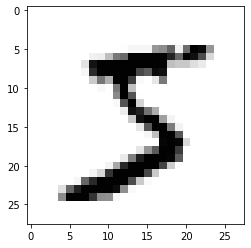

In [10]:
plt.imshow(x_train[0]).set_cmap('Greys')

In [ ]:
Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [11]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [12]:
y_train.shape

(60000,)

In [13]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [15]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",kernel_initializer=initializer_list[0]),
    tf.keras.layers.Dense(128, activation='sigmoid', activity_regularizer=regularizer)
])

#### My Own Model 

In [60]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation='relu',kernel_initializer=initializer_list[3]),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax'),
                                   ])

내가 만든 모델을 확인해 봅시다.

In [53]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

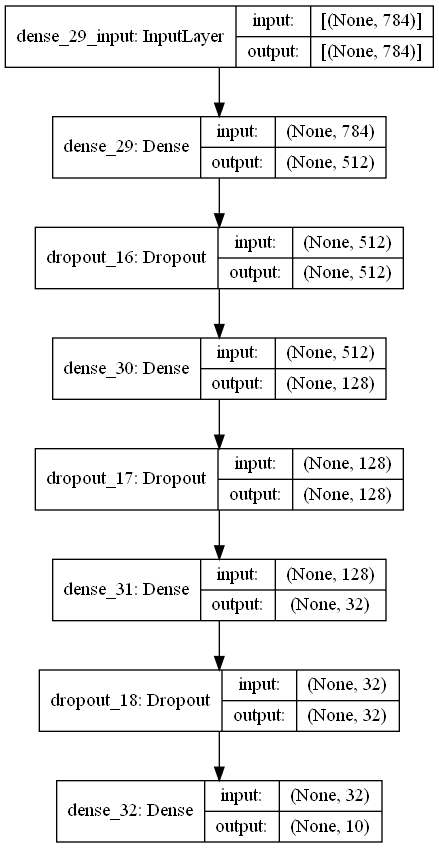

In [54]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

In [61]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = optimizer_list[2],
              metrics = ["accuracy"]
              )

model을 자유롭게 train 해봅시다.  

In [62]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2, batch_size = 32)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7616 - accuracy: 0.7599 - val_loss: 0.1812 - val_accuracy: 0.9536
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2499 - accuracy: 0.9375 - val_loss: 0.1456 - val_accuracy: 0.9644
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2077 - accuracy: 0.9509 - val_loss: 0.1554 - val_accuracy: 0.9647
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1881 - accuracy: 0.9578 - val_loss: 0.1547 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1911 - accuracy: 0.9594 - val_loss: 0.1503 - val_accuracy: 0.9704
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1843 - accuracy: 0.9637 - val_loss: 0.1532 - val_accuracy: 0.9706
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1768 - accuracy: 0.9662 - val_loss: 0.1686 - val_accuracy:

95%이상의 성능을 가진 모델을 만들면 완성!

In [63]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.1756 - accuracy: 0.9732

Accuracy: 0.9732000231742859


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)